In [37]:
# Import pacages
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager


In [38]:
# Create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to the url
page_url = 'https://www.youtube.com/@RussellBrand/videos'
driver.get(page_url)

In [39]:
from selenium.webdriver.common.by import By

# Click 'Reject all' cookies pop-up button
time.sleep(3)
driver.find_element(By.XPATH, '//span[text()="Reject all"]').click()

In [40]:
# Scroll page loop
for i in range(1000):
    #scroll 300 px
    driver.execute_script('window.scrollTo(0,(window.pageYOffset+300))')
    #waiting for the page to load
    time.sleep(4) 

# Find elements: title, views, length
video_title = driver.find_elements_by_id('video-title')
when_uploaded = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[2]')
video_views = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
video_length = driver.find_elements(By.XPATH, '//*[@id="text"]')


In [41]:
# Test if the above calls work
title = video_title[0].text
upload = when_uploaded[0].text
views = video_views[0].text
length = video_length[0].text

print(title, '-', upload, '-', views, '-', length)

In [ ]:
data = []

for i, j, k, l in zip(video_title, when_uploaded, video_views, video_length):
    data.append([i.text, j.text, k.text, l.text])
    #Create DataFrame
df = pd.DataFrame(data, columns = ['Title','WhenUploaded', 'Views', 'VideoLength'])
df.to_csv('russleBrand_yt_data_2.csv')

driver.quit()


<h2> Data wrangling and exploratory analysis <H2>

In [112]:
df = pd.read_csv('russleBrand_yt_data_2.csv')

# Remove column 'Unnamed: 0'
del df['Unnamed: 0']

# WebScraping only managed to get eery second video length - a more appropriete technique would be via YouTube API
del df['VideoLength']

df


,Title,WhenUploaded,Views
0,THEY LIED,14 hours ago,344K views
1,You're NOT ALLOWED To Say THIS About Jan 6th |...,2 days ago,380K views
2,WTF Is Happening?!,3 days ago,906K views
3,TRUMP DID WHAT?!,4 days ago,830K views
4,You’ve Gotta Be F**king Kidding Me,5 days ago,1.1M views
...,...,...,...
1949,BrandX: Benevolence,10 years ago,5K views
1950,BrandX: Financial Crisis,10 years ago,4.9K views
1951,BrandX: Fault,10 years ago,7.1K views
1952,BrandX: Dress Code,10 years ago,10K views


In [113]:
# Replace hours, weeks and months values in the WhenUploaded column with 'In the last 6 months' and 'This year'

import re

# Define regular expression pattern to match date strings in last 6 months
six_months_ago_pattern = r'(?:[1-6] months|[\d]{1,2} days?|[\d]{1,2} month?|[\d]{1,2} weeks?|[\d]{1,2} hours?) ago'

# Replace date strings with 'In the last 6 months'
df['WhenUploaded'] = df['WhenUploaded'].apply(lambda x: 'In the last 6 months' if re.match(six_months_ago_pattern, x) else x)

# Repeat the proccess for strings earlier than 6 months ago
this_year_pattern = r'(?:[7-9]|1[0-1]) months ago'
df['WhenUploaded'] = df['WhenUploaded'].apply(lambda x: 'This year' if re.match(this_year_pattern, x) else x)

# Remove word 'views' from the Views column
df['Views'] = df['Views'].str.replace('views', '')

# Convert K and M to numeric values
df['Views'] = df['Views'].replace({'K':'*1e3', 'M':'*1e6'}, regex=True).map(pd.eval).astype(int)

# Check if 'views' removed
df['WhenUploaded'].value_counts()


1 year ago              340
8 years ago             295
3 years ago             230
2 years ago             189
In the last 6 months    172
10 years ago            172
This year               152
7 years ago              99
5 years ago              89
4 years ago              84
9 years ago              75
6 years ago              57
Name: WhenUploaded, dtype: int64

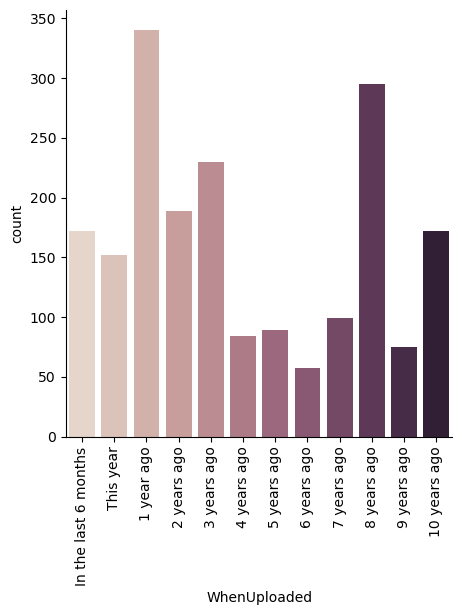

In [115]:
# Import vizualization pacages

import seaborn as sns
import matplotlib.pyplot as plt

# Count of videos uploaded per year
ax = sns.catplot(data=df, x='WhenUploaded', kind='count', palette='ch:.15')

# Turn x axis labels vertically 
ax.set_xticklabels(rotation=90)


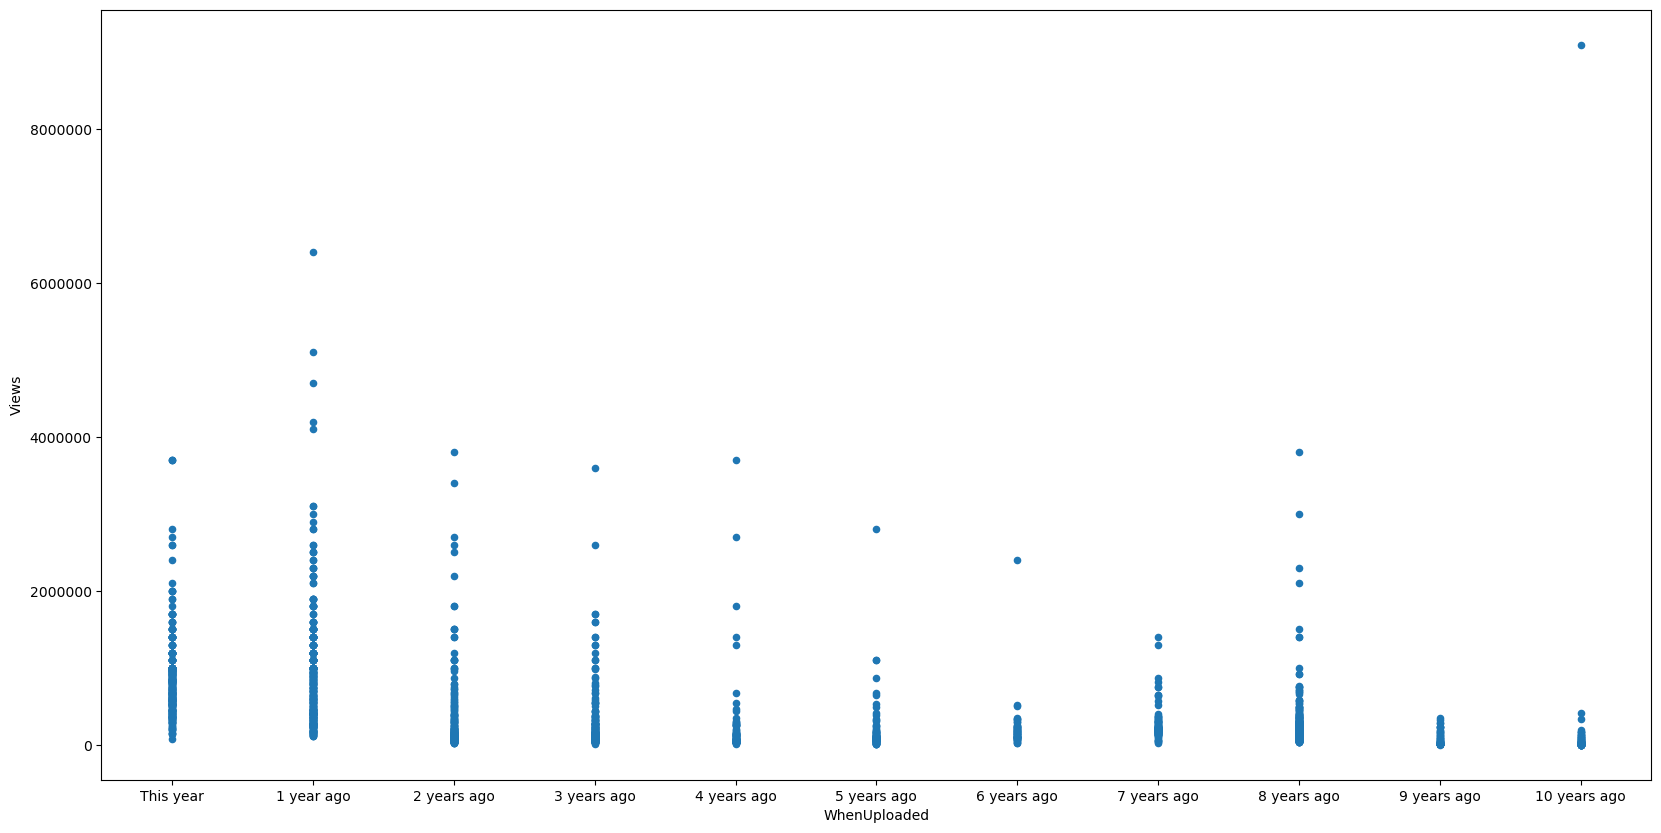

In [116]:
# Group 'WhenUploaded' into years
df['WhenUploaded'].replace(['In the last 6 months'], 'This year', inplace=True) 

# Draw a plot of Views distribution per year
my_plot = df[['WhenUploaded', 'Views']].plot(kind='scatter', x='WhenUploaded', y='Views', figsize=(20, 10))


In [72]:
# Most watched video
most_watched_video = df[df['Views'] > 8000000]
most_watched_video


,Title,WhenUploaded,Views
1819,OFFICIAL Video: Russell Brand Interviews Westb...,10 years ago,9100000


In [118]:
# Least watched video
df['Views'].min()
least_watched_video = df[df['Views'] <= 1400]
least_watched_video

,Title,WhenUploaded,Views
1878,Russell Brand Love X-Change,10 years ago,1400


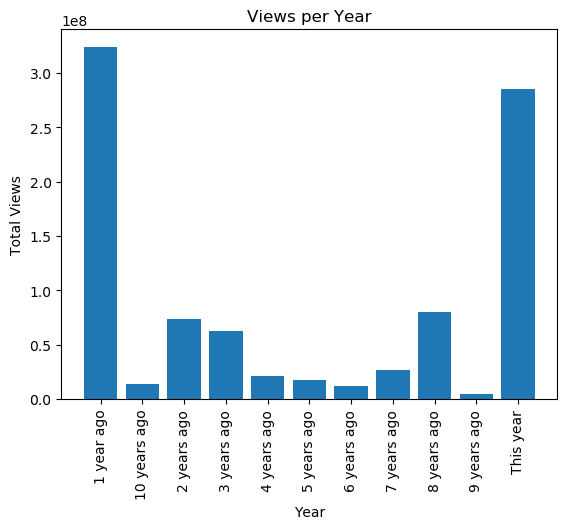

In [119]:
# SUM views per year
views_per_year = df.groupby(['WhenUploaded'])['Views'].sum()
views_per_year

plt.bar(views_per_year.index, views_per_year.values)

# add plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.title('Views per Year')

# rotate x-labels by 90 degrees
plt.xticks(rotation=90)

# show the plot
plt.show()